In [2]:
!pip install matplotlib

  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl (7.5 MB)
  Using cached fonttools-4.41.1-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached Pillow-10.0.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached importlib_resources-6.0.0-py3-none-any.whl (31 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.1.0-cp39-cp39-win_amd64.whl (429 kB)


You should consider upgrading via the 'C:\Users\I\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
CATEGORY = "글짓기"

In [28]:
df_train = pd.read_excel(f"./{CATEGORY}_train.xlsx")
df_val = pd.read_excel(f"./{CATEGORY}_val.xlsx")
df_all = pd.concat([df_train, df_val])

,text,cont0,cont1,cont2,cont3,exp0,exp1,exp2,org0,org1,org2,org3
0,페이커는 만 16세의 나이에 데뷔한 2세대 롤 프로게이머이다. \n 데뷔하기 전부터...,2,2,0,3,2,2,2,2,2,2,3
1,내 롤모델은 즐라탄 이브라히모비치이다. 유럽 선수들중에선 이름이 굉장히 길고 특이하...,3,2,0,3,3,3,2,2,3,3,3
2,이순신은 1545년 인종 1년때 3월 8일 서울 건천동에서 이정의 셋째 아들로 태어...,3,2,0,2,3,3,2,2,2,3,2
3,난 어릴 때 위인전은 박지성이였다. 박지성은 서울 관악구 신림동에서 출생했는데 집안...,3,2,0,2,2,2,2,2,3,3,2
4,"나의 멘토는 바로 나의 아버지이다.\n힘든 것이 있거나, 고민되는 것이 있다면 거의...",3,2,0,3,3,3,2,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
84,나의 롤모델은 이봉창이다. 이봉창은 열여섯 살 때 형과 함께 일본으로 건너갔다. 일...,2,2,0,2,3,3,3,3,3,3,3
85,나의 롤모델은 최제우다. 최제우는 몰락한 양반의 집안에서 첩의 아들로 태어났다. 당...,2,2,0,2,3,3,3,3,3,3,3
86,내인생의 롤모델은 부모님인거 같다. 어릴적엔 베토벤이나 이순신 같은 사람이 였는데 ...,3,3,0,3,3,3,3,3,3,3,3
87,나의 롤모델은 나의 아버지다. 나는 아버지가 좋다.나는 아버지가 대학을 나오신줄알았...,2,3,0,3,3,3,3,3,3,3,3


In [30]:
def divide_cata(or_df):
    _tempdf = pd.DataFrame()
    _tempdf["exp"] = or_df["exp0"] + or_df["exp1"] + or_df["exp2"]
    _tempdf["org"] = or_df["org0"] + or_df["org1"] + or_df["org2"] + or_df["org3"]
    _tempdf["cont"] = or_df["cont0"] + or_df["cont1"] + or_df["cont2"] + or_df["cont3"]
    _tempdf["total"] = _tempdf["exp"] + _tempdf["cont"] + _tempdf["org"]

    return _tempdf

30    20
30    27
Name: total, dtype: int64
Int64Index([30, 29, 27, 22, 23, 21, 24, 28, 20, 25, 26, 19, 18, 17, 11], dtype='int64')


Text(0, 0.5, 'Count')

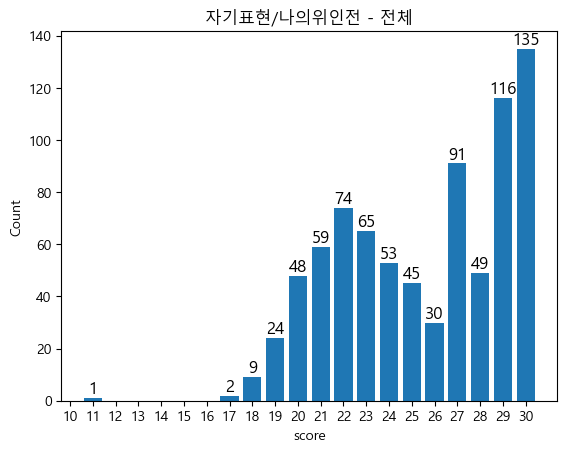

In [35]:
plt.rc('font', family='Malgun Gothic')

#_cata
df_train_cata = divide_cata(df_train)
df_val_cata = divide_cata(df_val)
df_all_cata = divide_cata(df_all)
#df_cata = [df_train_cata, df_val_cata, df_all_cata]

value_counts = df_all_cata["total"].value_counts()
value_dict = {}
for i in value_counts.index:
    print(df_all_cata["total"][i])
    break

x = value_counts.index
print(x)
y = value_counts.values
# 막대 그래프 생성
line_graph = plt.bar(x, y)
# 숫자 넣는 부분
# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, height, ha='center', va='bottom', size=12)

# 그래프 제목 설정
plt.title(f"자기표현/나의위인전 - 전체")
# x축 레이블 설정
plt.xlabel('score')
plt.xticks([x for x in range(10, 31)])
# y축 레이블 설정
plt.ylabel('Count')
